In [1]:
#Module to time and calculate the memory constaints of the various structural arrays

import sys
sys.path.insert(1,"src")
import nupack as n
import numpy as np
import matplotlib.pyplot as plt
import util
import GA_util
import time
import tensorflow as tf

In [2]:
sequences = np.load('data/toehold_data/collins_encoded.npy')

In [12]:
time_save = []
for i in range(3):
    x_time_start = time.time()


    # x = GA_util.prototype_ppms_fast(sequences)
    x = GA_util.create_ppms_fast(sequences)

    x_time = time.time() - x_time_start

    time_save.append(x_time)
    print("Size of the array: ", x.size)

    print("Memory size of one array element in bytes: ",x.itemsize)

    # memory size of numpy array
    x_size = (x.size * x.itemsize) / 1e9
    print(x_size)

Size of the array:  199371600
Memory size of one array element in bytes:  8
1.5949728
Size of the array:  199371600
Memory size of one array element in bytes:  8
1.5949728
Size of the array:  199371600
Memory size of one array element in bytes:  8
1.5949728


In [13]:
time_save

[6.951246023178101, 6.877479076385498, 6.8153369426727295]

In [17]:
np.mean(time_save)

6.881354014078776

In [6]:
y_time_save = []

for i in range(3):
    mod = n.Model()

    y_time_start = time.time()

    y = GA_util.create_ppms_nupack(sequences,mod)

    y_time = time.time() - y_time_start
    y_time_save.append(y_time)
    print("Size of the array: ", y.size)

    print("Memory size of one array element in bytes: ",y.itemsize)

    # memory size of numpy array
    y_size = (y.size * y.itemsize) / 1e9

Size of the array:  199371600
Memory size of one array element in bytes:  8
Size of the array:  199371600
Memory size of one array element in bytes:  8
Size of the array:  199371600
Memory size of one array element in bytes:  8


In [7]:
y_time_save

[152.70020008087158, 151.69818377494812, 149.37996101379395]

In [14]:
# Function definition to create complementary matrix of RNA molecule from DNA
def one_hot_special_complementarity_directional_matrix(x, show=False):
    """Produce complementarity matrix for the given RNA molecule.
    by Luis Soenksen 2019-03-15
    Complementary bases (according to Watson-Crick) are assigned the following values:
    G-C are assigned 6 = [0 0 0 0 0 0 1], 
    C-G are assigned 5 = [0 0 0 0 0 1 0], 
    A-U are assigned 4 = [0 0 0 0 1 0 0],
    U-A are assigned 3 = [0 0 0 1 0 0 0],
    G-U are assigned 2 = [0 0 1 0 0 0 0], 
    U-G are assigned 1 = [0 1 0 0 0 0 0], 
    NonWCpairs are   0 = [1 0 0 0 0 0 0],

    Args:
        m: Molecule object (DNA or RNA)
        show (bool): Make a matrix plot of the result.

    Returns:
        p_oh: One-Hot Encoded Categorical Complementarity-directional Matrix
        p: Categorical(integer) Complementarity-directional Matrix
    """
    # Imports
    from keras.utils import to_categorical
    
#     #Add extra padding to desired length
#     while len(x) < 120:
#         x=x+'N'

#     if isinstance(x, str):
#     # If input is string do this
#         # Generate complementary matrix from sequence str & calculated dot-bracket secondary structure
#         seq = Bio.Seq.transcribe(x) #Each row in the series is a toehold sequence
#         l = len(seq)
#         p = np.zeros((l, l), dtype='int8')
#         for i in range(l):
#             for j in range(l):
#                 if seq[i] == 'G' and seq[j] == 'C' :
#                     p[i, j] = 6
#                 if seq[i] == 'A' and seq[j] == 'U' :
#                     p[i, j] = 4  
#                 if seq[i] == 'G' and seq[j] == 'U' :
#                     p[i, j] = 2

#                 # By default... if m.seq[i] == m.seq[j] ; p[i, j] = 0

#                 if seq[i] == 'C' and seq[j] == 'G':
#                     p[i, j] = 5
#                 if seq[i] == 'U' and seq[j] == 'A':
#                     p[i, j] = 3  
#                 if seq[i] == 'U' and seq[j] == 'G':
#                     p[i, j] = 1

#         if show:
#             fig = plt.figure(dpi=300)
#             ax = fig.add_subplot(111)
#             cmap = plt.get_cmap('jet', np.max(p)-np.min(p)+1)
#             pos = ax.matshow(p, interpolation='nearest', cmap=cmap)
#             ax.set_xticks(np.arange(l))
#             ax.set_yticks(np.arange(l))


#             # Add colorbar to make it easy to read the energy levels
#             cbar = plt.colorbar(pos, ticks=np.arange(np.min(p),np.max(p)+1))
#             plt.show()                    
       
                    
    if (isinstance(x, np.ndarray) and np.array_equal(x , x.astype(bool))):
    # If input is one-hot encoded
        m = x  
        l = len(m)
        p = np.zeros((l, l), dtype='int8')

        A = np.array([1.,0.,0.,0.])
        C = np.array([0.,1.,0.,0.])
        G = np.array([0.,0.,1.,0.])
        U = np.array([0.,0.,0.,1.]) # "T" or "U"

        for i in range(l):
            for j in range(l):
                if (np.array_equal(m[i], G) and np.array_equal(m[j], C)):
                    p[i, j] = 6
                if (np.array_equal(m[i], A) and np.array_equal(m[j], U)):
                    p[i, j] = 4  
                if (np.array_equal(m[i], G) and np.array_equal(m[j], U)):
                    p[i, j] = 2

                # By default... if m.seq[i] == m.seq[j] ; p[i, j] = 0

                if (np.array_equal(m[i], C) and np.array_equal(m[j], G)):
                    p[i, j] = 5
                if (np.array_equal(m[i], U) and np.array_equal(m[j], A)):
                    p[i, j] = 3  
                if (np.array_equal(m[i], U) and np.array_equal(m[j], G)):
                    p[i, j] = 1 
    
 
    else:
        p = np.empty([118, 118,7])
    
    p_oh = to_categorical(p[:,:]) #Convert to one hot     
    p_oh_tensor = tf.convert_to_tensor(p_oh) #Convert to one hot           
    return p_oh_tensor, p_oh, p


# Function to generate single complementary matrix array from linear toehold sequence
def seq2complementaryMap(x):
    _, p_oh , _ = one_hot_special_complementarity_directional_matrix(x, show=False)
    out = p_oh.astype(bool)
    return out

In [15]:
z_time_save = []
for i in range(3):
    t_sequences = np.transpose(sequences,(0,2,1)) #Collins pipeline uses transpose of ours

    z_time_start = time.time()

    z = np.zeros(shape=(t_sequences.shape[0],t_sequences.shape[1],t_sequences.shape[1],7))

    for i in range(t_sequences.shape[0]):
        z[i,:,:,:] = seq2complementaryMap(t_sequences[0,:,:])

    z_time = time.time() - z_time_start
    
    z_time_save.append(z_time)

    

In [16]:
print("Size of the array: ", z.size)
 
print("Memory size of one array element in bytes: ",z.itemsize)
 
# memory size of numpy array
z_size = (z.size * z.itemsize) / 1e9

Size of the array:  1395601200
Memory size of one array element in bytes:  8


In [17]:
# memory_bar = [x_size,y_size,z_size]
time_bar = [time_save,y_time_save,z_time_save]

time_var = [np.std(i) for i in time_bar]
time_bar = [np.mean(i) for i in time_bar]


time_var

[0.020311773052571536, 0.3427536325711702, 6819.9828846782375]

In [18]:
y_time_save

[147.52964615821838, 148.36392617225647, 148.02829003334045]

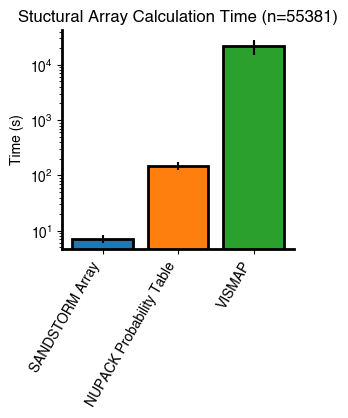

In [28]:
plt.figure(figsize=(3,3))
plt.rcParams.update({'font.size': 10,'font.family':'Helvetica'})
# plt.title('Toehold Switch Structural Agreement')
for i in range(len(time_bar)):
    plt.bar(i,time_bar[i],alpha=1,edgecolor='black',linewidth=2,yerr=time_var[i])

plt.scatter([i for i in range(len(time_bar))],time_bar,color='black',marker='|',label = ['%.2f'%i for i in time_bar])
for i in range(len(time_bar)):
    plt.annotate(text='%s'%'',xy=(i,time_bar[i]),xytext=(i-0.3,time_bar[i]+10)) #manually dropping in values due to plotting bug

plt.ylabel('Time (s)')
plt.subplot().spines['right'].set_visible(False)
plt.subplot().spines['top'].set_visible(False)
plt.subplot().spines['left'].set_linewidth(2.0)
plt.subplot().spines['bottom'].set_linewidth(2.0)
plt.subplots_adjust(bottom=0.15)
plt.yscale('log')
plt.xticks(ticks=[0,1,2],labels=['SANDSTORM Array','NUPACK Probability Table','VISMAP',],rotation=60,ha='right')
plt.title('Stuctural Array Calculation Time (n=%s)'%sequences.shape[0])
# plt.tight_layout()
# plt.savefig('figures/structure_comparison_times.png',dpi=1000,bbox_inches='tight',pad_inches=1,transparent=True)
plt.savefig('figures/structure_comparison_times.svg',bbox_inches='tight',pad_inches=1,transparent=True)

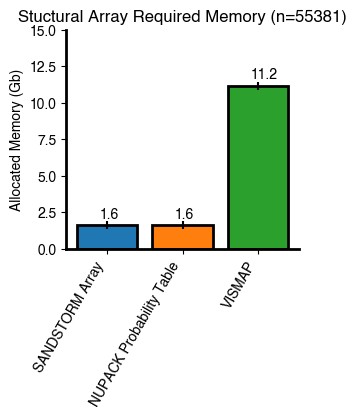

In [15]:
 plt.figure(figsize=(3,3))
plt.rcParams.update({'font.size': 10,'font.family':'Helvetica'})
# plt.title('Toehold Switch Structural Agreement')
for i in range(len(memory_bar)):
    plt.bar(i,memory_bar[i],alpha=1,edgecolor='black',linewidth=2)

plt.scatter([i for i in range(len(memory_bar))],memory_bar,color='black',marker='|',label = ['%.2f'%i for i in memory_bar])
for i in range(len(time_bar)):
    plt.annotate(text='%.1f'%memory_bar[i],xy=(i,memory_bar[i]),xytext=(i-0.1,memory_bar[i]+0.5))

plt.ylabel('Allocated Memory (Gb)')
plt.subplot().spines['right'].set_visible(False)
plt.subplot().spines['top'].set_visible(False)
plt.subplot().spines['left'].set_linewidth(2.0)
plt.subplot().spines['bottom'].set_linewidth(2.0)
plt.subplots_adjust(bottom=0.15)
plt.ylim([0,15])
# plt.yscale('log')
plt.xticks(ticks=[0,1,2],labels=['SANDSTORM Array','NUPACK Probability Table','VISMAP',],rotation=60,ha='right')
plt.title('Stuctural Array Required Memory (n=%s)'%sequences.shape[0])
# plt.tight_layout()
# plt.savefig('figures/structure_comparison_memory.png',dpi=500,bbox_inches='tight',pad_inches=1,transparent=True)
plt.savefig('figures/structure_comparison_memory.svg',bbox_inches='tight',pad_inches=1,transparent=True)